In [70]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Загрузим данные и отмаштабируем их

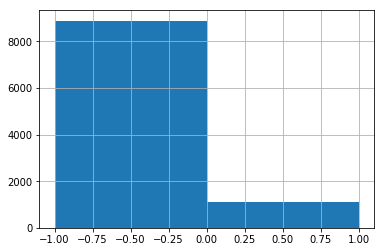

In [86]:
data = pd.read_excel('geo.xlsx')
data = data.iloc[:10000]
data.comment_class.hist(bins=2)

In [87]:
data_cord_scaled = data.copy()
data_cord_scaled[['x', 'y']] = StandardScaler().fit_transform(data_cord_scaled[['x', 'y']])

# Возьмем два алгоритма кластеризации и запустим их с дефолтными параметрами (пока без учета голосов) 

In [88]:
algorithms = [
    KMeans(n_clusters=2),
    DBSCAN(),
]

In [89]:
def get_descr(algo_name, X, y_pred, y=None):
    return '{}\nSilhouette {:.2f}'.format(
            algo_name,
            silhouette_score(X, y_pred)
        )

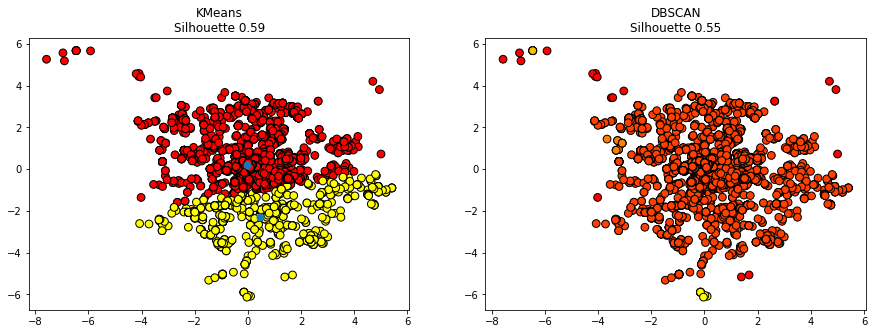

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(data_cord_scaled[['x', 'y']])
    ax.scatter(data_cord_scaled.x, data_cord_scaled.y, c=clusters, cmap='autumn', s=60, edgecolors='black')
    ax.set_title(get_descr(algorithm.__class__.__name__, data_cord_scaled, clusters))
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

# Подберем кол-во кластеров для k-mean

In [91]:
k_inertia = []
ks = range(1,50)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_cord_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

42

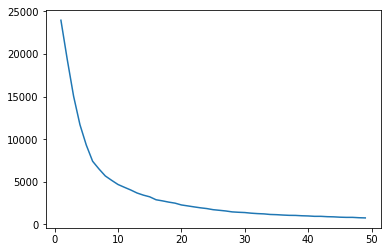

In [92]:
plt.plot(ks, k_inertia)

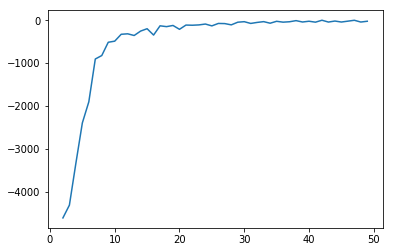

In [93]:
plt.plot(ks[1:], diff)

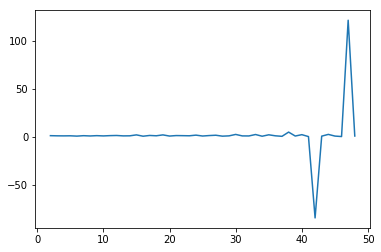

In [94]:
plt.plot(ks[1:-1], diff_r)

In [98]:
algorithms = [
    KMeans(n_clusters=42),
]

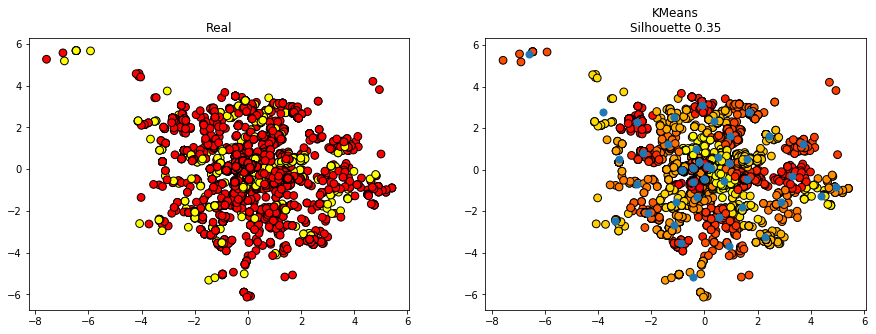

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(data_cord_scaled.x, data_cord_scaled.y, c=data.comment_class, cmap='autumn', s=60, edgecolors='black')
axes[0].set_title('Real')
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(data_cord_scaled[['x', 'y']])
    ax.scatter(data_cord_scaled.x, data_cord_scaled.y, c=clusters, cmap='autumn', s=60, edgecolors='black')
    ax.set_title(get_descr(algorithm.__class__.__name__, data_cord_scaled, clusters, data.comment_class))
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

# Проделаем аналоничную работу для голосовавших против

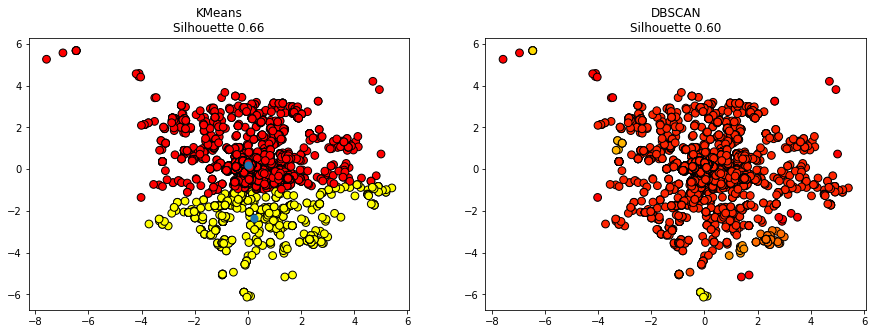

In [105]:
algorithms = [
    KMeans(n_clusters=2),
    DBSCAN(),
]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data_coord_scaled__1 = data_cord_scaled[data_cord_scaled.comment_class==-1]
for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(data_coord_scaled__1[['x', 'y']])
    ax.scatter(data_coord_scaled__1.x, data_coord_scaled__1.y, c=clusters, cmap='autumn', s=60, edgecolors='black')
    ax.set_title(get_descr(algorithm.__class__.__name__, data_coord_scaled__1, clusters))
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

In [106]:
k_inertia = []
ks = range(1,50)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_coord_scaled__1, )
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

45

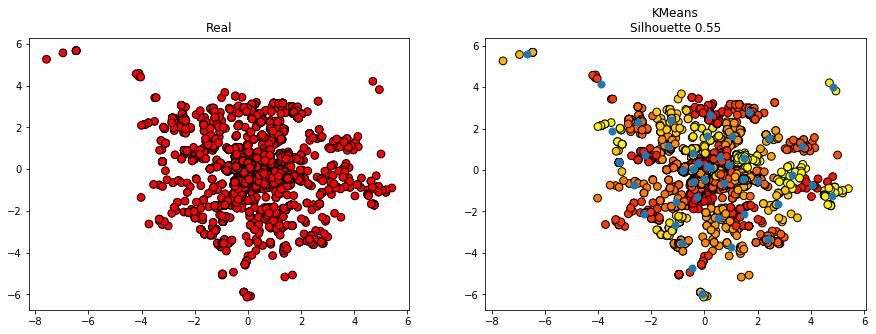

In [108]:
algorithms = [
    KMeans(n_clusters=45),
]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(data_coord_scaled__1.x, data_coord_scaled__1.y, c=data_coord_scaled__1.comment_class, cmap='autumn', s=60, edgecolors='black')
axes[0].set_title('Real')
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(data_coord_scaled__1)
    ax.scatter(data_coord_scaled__1.x, data_coord_scaled__1.y, c=clusters, cmap='autumn', s=60, edgecolors='black')
    ax.set_title(get_descr(algorithm.__class__.__name__, data_coord_scaled__1, clusters))
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

# Проделаем аналоничную работу для голосовавших за

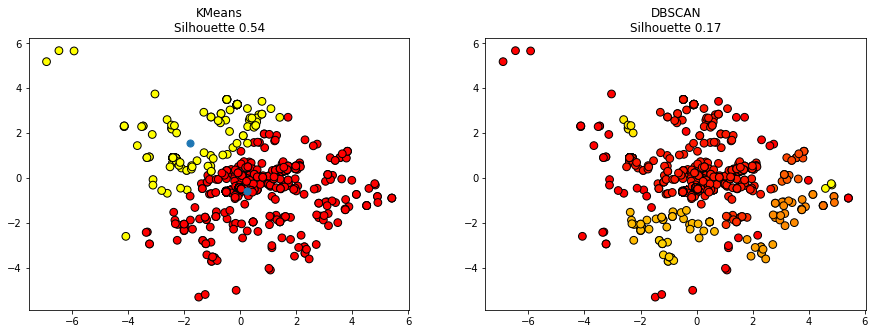

In [109]:
algorithms = [
    KMeans(n_clusters=2),
    DBSCAN(),
]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data_coord_scaled__1 = data_cord_scaled[data_cord_scaled.comment_class==1]
for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(data_coord_scaled__1[['x', 'y']])
    ax.scatter(data_coord_scaled__1.x, data_coord_scaled__1.y, c=clusters, cmap='autumn', s=60, edgecolors='black')
    ax.set_title(get_descr(algorithm.__class__.__name__, data_coord_scaled__1, clusters))
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

In [110]:
k_inertia = []
ks = range(1,50)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_coord_scaled__1, )
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

46

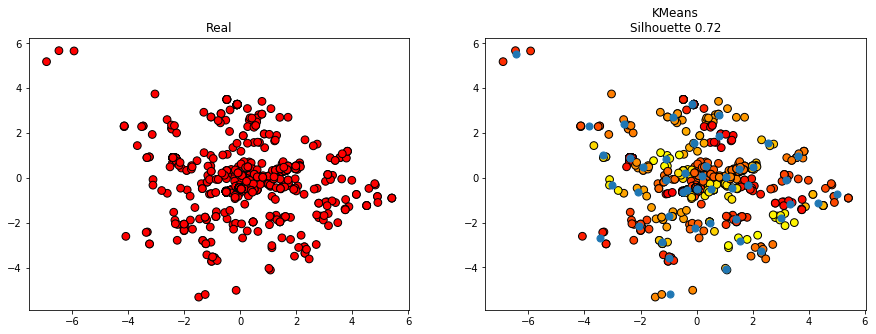

In [111]:
algorithms = [
    KMeans(n_clusters=46),
]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(data_coord_scaled__1.x, data_coord_scaled__1.y, c=data_coord_scaled__1.comment_class, cmap='autumn', s=60, edgecolors='black')
axes[0].set_title('Real')
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(data_coord_scaled__1)
    ax.scatter(data_coord_scaled__1.x, data_coord_scaled__1.y, c=clusters, cmap='autumn', s=60, edgecolors='black')
    ax.set_title(get_descr(algorithm.__class__.__name__, data_coord_scaled__1, clusters))
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)